In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download S&P500 data with maximum available history
ticker = "^GSPC"
data = yf.download(ticker, period="max", interval="1d")

# Filter data from specific window
window_frame = "2000-01-01"
end_of_window = "2023-12-31"
data = data[(data.index >= window_frame) & (data.index <= end_of_window)]
data['TICKER'] = ticker

data.reset_index(inplace=True)
data = data.rename(columns={'Date': 'FIRST_OPEN_DATE', 'Open': 'OPEN', 'High': 'HIGH', 'Low': 'LOW', 'Close': 'CLOSE'})

data.tail(25)


[*********************100%***********************]  1 of 1 completed
C:\Users\a-niv\AppData\Local\Temp\ipykernel_14736\3384861513.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TICKER'] = ticker


FIRST_OPEN_DATE         OPEN         HIGH          LOW        CLOSE  \
6012      2023-11-24  4555.839844  4560.310059  4552.799805  4559.339844   
6013      2023-11-27  4554.859863  4560.520020  4546.319824  4550.430176   
6014      2023-11-28  4545.549805  4568.140137  4540.509766  4554.890137   
6015      2023-11-29  4571.839844  4587.640137  4547.149902  4550.580078   
6016      2023-11-30  4554.870117  4569.890137  4537.240234  4567.799805   
6017      2023-12-01  4559.430176  4599.390137  4554.709961  4594.629883   
6018      2023-12-04  4564.370117  4572.370117  4546.720215  4569.779785   
6019      2023-12-05  4557.250000  4578.560059  4551.680176  4567.180176   
6020      2023-12-06  4586.229980  4590.740234  4546.500000  4549.339844   
6021      2023-12-07  4568.839844  4590.919922  4565.220215  4585.589844   
6022      2023-12-08  4576.200195  4609.229980  4574.060059  4604.370117   
6023      2023-12-11  4593.390137  4623.709961  4593.390137  4622.439941   
6024      2023-12-12  4618.299805  4643.930176  4608.089844  4643.700195   
6025      2023-12-13  4646.200195  4709.689941  4643.229980  4707.089844   
6026      2023-12-14  4721.040039  4738.569824  4694.339844  4719.549805   
6027      2023-12-15  4714.229980  4725.529785  4704.689941  4719.189941   
6028      2023-12-18  4725.580078  4749.520020  4725.580078  4740.560059   
6029      2023-12-19  4743.720215  4768.689941  4743.720215  4768.370117   
6030      2023-12-20  4764.729980  4778.009766  4697.819824  4698.350098   
6031      2023-12-21  4724.290039  4748.709961  4708.350098  4746.750000   
6032      2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883   
6033      2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000   
6034      2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078   
6035      2023-12-28  4786.439941  4793.299805  4780.979980  4783.350098   
6036      2023-12-29  4782.879883  4788.430176  4751.990234  4769.830078   

        Adj Close      Volume TICKER  
6012  4559.339844  1639500000  ^GSPC  
6013  4550.430176  3403990000  ^GSPC  
6014  4554.890137  3586240000  ^GSPC  
6015  4550.580078  4418760000  ^GSPC  
6016  4567.799805  5399300000  ^GSPC  
6017  4594.629883  4397120000  ^GSPC  
6018  4569.779785  4369910000  ^GSPC  
6019  4567.180176  3909950000  ^GSPC  
6020  4549.339844  4245680000  ^GSPC  
6021  4585.589844  3818880000  ^GSPC  
6022  4604.370117  3707010000  ^GSPC  
6023  4622.439941  3823210000  ^GSPC  
6024  4643.700195  3808380000  ^GSPC  
6025  4707.089844  5063650000  ^GSPC  
6026  4719.549805  6314040000  ^GSPC  
6027  4719.189941  8218980000  ^GSPC  
6028  4740.560059  4060340000  ^GSPC  
6029  4768.370117  4026970000  ^GSPC  
6030  4698.350098  4201320000  ^GSPC  
6031  4746.750000  3431180000  ^GSPC  
6032  4754.629883  3046770000  ^GSPC  
6033  4774.750000  2513910000  ^GSPC  
6034  4781.580078  2748450000  ^GSPC  
6035  4783.350098  2698860000  ^GSPC  
6036  4769.830078  3126060000  ^GSPC

In [2]:
# Ensure 'FIRST_OPEN_DATE' is in datetime format
data['FIRST_OPEN_DATE'] = pd.to_datetime(data['FIRST_OPEN_DATE'])

# Sort dates to facilitate finding the next trading day
data_sorted = data['FIRST_OPEN_DATE'].sort_values().unique()

# Function to find the first trading day of a given month
def find_first_trading_day_for_month(year, month):
    start_date = pd.Timestamp(f'{year}-{month:02d}-01')
    relevant_dates = data_sorted[(data_sorted >= start_date) & (data_sorted.month == month)]
    
    if relevant_dates.size == 0:
        return None
    
    return relevant_dates[0]

def assign_trading_day(year, month, day):
    try:
        requested_date = pd.Timestamp(f'{year}-{month:02d}-{day:02d}')
        
        if requested_date in data_sorted:
            return requested_date
        else:
            next_trading_day = find_first_trading_day_for_month(year, month)
            relevant_dates = data_sorted[(data_sorted > requested_date) & (data_sorted.month == month)]
            
            if relevant_dates.size == 0:
                next_month = month + 1
                next_year = year
                if next_month > 12:
                    next_month = 1
                    next_year += 1
                
                return find_first_trading_day_for_month(next_year, next_month)
            return relevant_dates[0]
    except ValueError:
        next_month = month + 1
        next_year = year
        if next_month > 12:
            next_month = 1
            next_year += 1
        
        return find_first_trading_day_for_month(next_year, next_month)

# List of months and days to process
months = list(range(1, 13))  # From 1 to 12
days = list(range(1, 32))    # From 1 to 31

# Create an empty DataFrame to store the results
results = []

# For each month and day, assign the first trading day
for year in range(2010, 2024):
    for month in months:
        for day in days:
            matching_date = assign_trading_day(year, month, day)
            month_str = f'{year}-{month:02d}'
            results.append({'CHOSEN_DAY': day, 'FIRST_OPEN_DATE': matching_date, 'MONTH': month_str})

# Create the DataFrame with results
result_df = pd.DataFrame(results)

normalized_data = pd.merge(result_df, data, on='FIRST_OPEN_DATE')
normalized_data = normalized_data.sort_values(by=['CHOSEN_DAY', 'MONTH'])
normalized_data['DAY'] = normalized_data['FIRST_OPEN_DATE'].dt.day
normalized_data = normalized_data.sort_values(by=['CHOSEN_DAY','FIRST_OPEN_DATE'])
normalized_data.tail(30)


CHOSEN_DAY FIRST_OPEN_DATE    MONTH         OPEN         HIGH  \
4370          31      2021-10-01  2021-09  4317.160156  4375.189941   
4432          31      2021-12-01  2021-11  4602.819824  4652.939941   
4463          31      2021-12-31  2021-12  4775.209961  4786.830078   
4122          31      2022-01-03  2021-01  4778.140137  4796.640137   
4494          31      2022-01-31  2022-01  4431.790039  4516.890137   
4525          31      2022-03-01  2022-02  4363.140137  4378.450195   
4556          31      2022-03-31  2022-03  4599.020020  4603.069824   
4246          31      2022-05-02  2021-05  4130.609863  4169.810059   
4587          31      2022-05-02  2022-04  4130.609863  4169.810059   
4618          31      2022-05-31  2022-05  4151.089844  4168.339844   
4308          31      2022-07-01  2021-07  3781.000000  3829.820068   
4649          31      2022-07-01  2022-06  3781.000000  3829.820068   
4711          31      2022-08-31  2022-08  4000.669922  4015.370117   
4401          31      2022-10-03  2021-10  3609.780029  3698.350098   
4742          31      2022-10-03  2022-09  3609.780029  3698.350098   
4773          31      2022-10-31  2022-10  3881.850098  3893.729980   
4804          31      2022-12-01  2022-11  4087.139893  4100.509766   
4866          31      2023-01-31  2023-01  4020.850098  4077.159912   
4897          31      2023-03-01  2023-02  3963.340088  3971.729980   
4928          31      2023-03-31  2023-03  4056.179932  4110.750000   
4959          31      2023-05-01  2023-04  4166.790039  4186.919922   
4990          31      2023-05-31  2023-05  4190.740234  4195.439941   
4680          31      2023-07-03  2022-07  4450.479980  4456.459961   
5021          31      2023-07-03  2023-06  4450.479980  4456.459961   
5052          31      2023-07-31  2023-07  4584.819824  4594.220215   
5083          31      2023-08-31  2023-08  4517.009766  4532.259766   
5114          31      2023-10-02  2023-09  4284.520020  4300.580078   
5145          31      2023-10-31  2023-10  4171.330078  4195.549805   
4835          31      2023-12-01  2022-12  4559.430176  4599.390137   
5176          31      2023-12-01  2023-11  4559.430176  4599.390137   

              LOW        CLOSE    Adj Close      Volume TICKER  DAY  
4370  4288.520020  4357.040039  4357.040039  4010370000  ^GSPC    1  
4432  4510.270020  4513.040039  4513.040039  5366730000  ^GSPC    1  
4463  4765.750000  4766.180176  4766.180176  2677820000  ^GSPC   31  
4122  4758.169922  4796.560059  4796.560059  3831020000  ^GSPC    3  
4494  4414.020020  4515.549805  4515.549805  5098610000  ^GSPC   31  
4525  4279.540039  4306.259766  4306.259766  5846230000  ^GSPC    1  
4556  4530.410156  4530.410156  4530.410156  4823020000  ^GSPC   31  
4246  4062.510010  4155.379883  4155.379883  5163790000  ^GSPC    2  
4587  4062.510010  4155.379883  4155.379883  5163790000  ^GSPC    2  
4618  4104.879883  4132.149902  4132.149902  6822640000  ^GSPC   31  
4308  3752.100098  3825.330078  3825.330078  4046950000  ^GSPC    1  
4649  3752.100098  3825.330078  3825.330078  4046950000  ^GSPC    1  
4711  3954.530029  3955.000000  3955.000000  4542490000  ^GSPC   31  
4401  3604.929932  3678.429932  3678.429932  4806680000  ^GSPC    3  
4742  3604.929932  3678.429932  3678.429932  4806680000  ^GSPC    3  
4773  3863.179932  3871.979980  3871.979980  4820620000  ^GSPC   31  
4804  4050.870117  4076.570068  4076.570068  4527130000  ^GSPC    1  
4866  4020.439941  4076.600098  4076.600098  4679320000  ^GSPC   31  
4897  3939.050049  3951.389893  3951.389893  4249480000  ^GSPC    1  
4928  4056.179932  4109.310059  4109.310059  4525120000  ^GSPC   31  
4959  4164.120117  4167.870117  4167.870117  3321370000  ^GSPC    1  
4990  4166.149902  4179.830078  4179.830078  5980670000  ^GSPC   31  
4680  4442.290039  4455.589844  4455.589844  2034280000  ^GSPC    3  
5021  4442.290039  4455.589844  4455.589844  2034280000  ^GSPC    3  
5052  4573.140137  4588.959961  4588.959961  450360000

In [11]:
# Normalize each month with a base of 100
normalized_data['BASE_OPEN'] = np.nan
normalized_data['BASE_HIGH'] = np.nan
normalized_data['BASE_LOW'] = np.nan
normalized_data['BASE_CLOSE'] = np.nan

for month in normalized_data['MONTH'].unique():
    monthly_data = normalized_data[normalized_data['MONTH'] == month]
    if not monthly_data.empty:
        base_open = monthly_data.iloc[0]['OPEN']
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_OPEN'] = 100 * (monthly_data['OPEN'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_HIGH'] = 100 * (monthly_data['HIGH'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_LOW'] = 100 * (monthly_data['LOW'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_CLOSE'] = 100 * (monthly_data['CLOSE'] / base_open)

normalized_data = normalized_data.sort_values(by=['CHOSEN_DAY', 'MONTH'])
normalized_data

CHOSEN_DAY FIRST_OPEN_DATE    MONTH         OPEN         HIGH  \
0              1      2010-01-04  2010-01  1116.560059  1133.869995   
31             1      2010-02-01  2010-02  1073.890015  1089.380005   
62             1      2010-03-01  2010-03  1105.359985  1116.109985   
93             1      2010-04-01  2010-04  1171.229980  1181.430054   
124            1      2010-05-03  2010-05  1188.579956  1205.130005   
...          ...             ...      ...          ...          ...   
5052          31      2023-07-31  2023-07  4584.819824  4594.220215   
5083          31      2023-08-31  2023-08  4517.009766  4532.259766   
5114          31      2023-10-02  2023-09  4284.520020  4300.580078   
5145          31      2023-10-31  2023-10  4171.330078  4195.549805   
5176          31      2023-12-01  2023-11  4559.430176  4599.390137   

              LOW        CLOSE    Adj Close      Volume TICKER  DAY  \
0     1116.560059  1132.989990  1132.989990  3991400000  ^GSPC    4   
31    1073.890015  1089.189941  1089.189941  4077610000  ^GSPC    1   
62    1105.359985  1115.709961  1115.709961  3847640000  ^GSPC    1   
93    1170.689941  1178.099976  1178.099976  4006870000  ^GSPC    1   
124   1188.579956  1202.260010  1202.260010  4938050000  ^GSPC    3   
...           ...          ...          ...         ...    ...  ...   
5052  4573.140137  4588.959961  4588.959961  4503600000  ^GSPC   31   
5083  4507.390137  4507.660156  4507.660156  3946360000  ^GSPC   31   
5114  4260.209961  4288.390137  4288.390137  3938660000  ^GSPC    2   
5145  4153.120117  4193.799805  4193.799805  4249470000  ^GSPC   31   
5176  4554.709961  4594.629883  4594.629883  4397120000  ^GSPC    1   

       BASE_OPEN   BASE_HIGH    BASE_LOW  BASE_CLOSE  
0     100.000000  101.550292  100.000000  101.471478  
31    100.000000  101.442419  100.000000  101.424720  
62    100.000000  100.972534  100.000000  100.936344  
93    100.000000  100.870886   99.953891  100.586562  
124   100.000000  101.392422  100.000000  101.150958  
...          ...         ...         ...         ...  
5052  103.018547  103.229769  102.756111  103.111574  
5083   98.649867   98.982921   98.439777   98.445675  
5114   94.568488   94.922968   94.031913   94.653910  
5145   97.358165   97.923450   96.933148   97.882605  
5176  108.525045  109.476185  108.412693  109.362880  

[5206 rows x 15 columns]

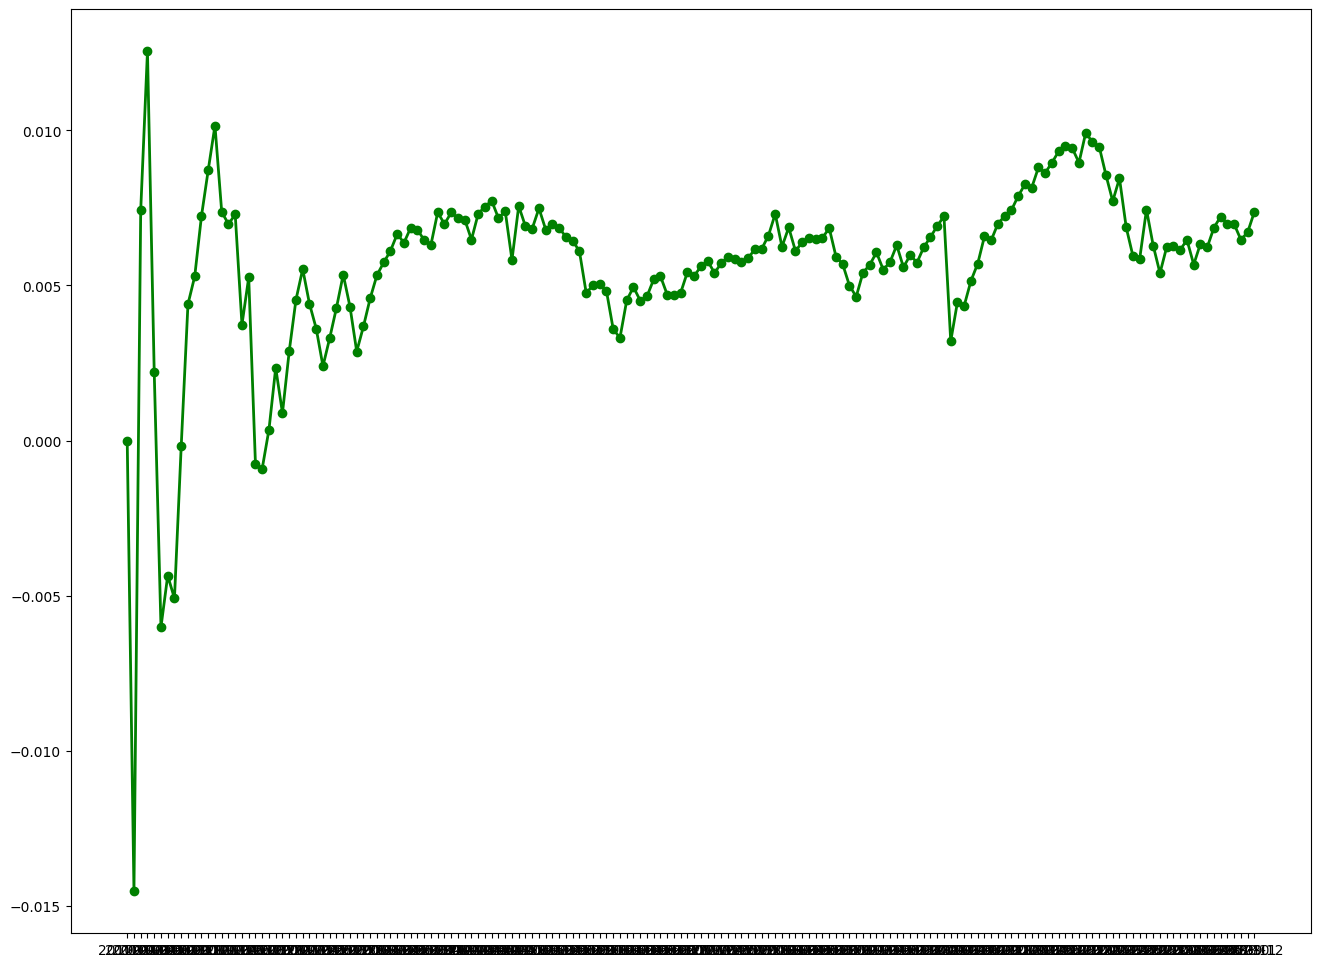

In [4]:
investing_day = 14
dataset = normalized_data.loc[normalized_data['CHOSEN_DAY'] == investing_day, ['TICKER', 'FIRST_OPEN_DATE', 'OPEN', 'BASE_OPEN', 'CHOSEN_DAY', 'MONTH']]
dataset.reset_index(drop=True, inplace=True)
dataset['OPEN'] = pd.to_numeric(dataset['OPEN'], errors='coerce')
dataset['INVESTED_THIS_DAY'] = 10000
dataset['TOTAL_INVESTED'] = dataset['INVESTED_THIS_DAY'].cumsum()

# Calculate the number of shares bought
dataset['SHARES_BOUGHT_THIS_DAY'] = dataset['INVESTED_THIS_DAY'] / dataset['OPEN']
dataset['HELD_SHARES'] = dataset['SHARES_BOUGHT_THIS_DAY'].cumsum()
dataset['TOTAL_VALUE'] = dataset['HELD_SHARES'] * dataset['OPEN']
dataset['PERF'] = dataset['TOTAL_VALUE'] / dataset['TOTAL_INVESTED'] - 1

# Calculate the cumulative occurrences for each day
dataset['DAY_OCCURRENCE'] = dataset.groupby('CHOSEN_DAY').cumcount() + 1
# Calculate the average performance per line based on cumulative occurrences
dataset['AVG_PERF'] = dataset['PERF'] / dataset['DAY_OCCURRENCE']

# Plot the results
plt.figure(figsize=(16, 12))
plt.plot(dataset['MONTH'], dataset['AVG_PERF'], marker='o', color='green', linestyle='-', linewidth=2)
plt.show()


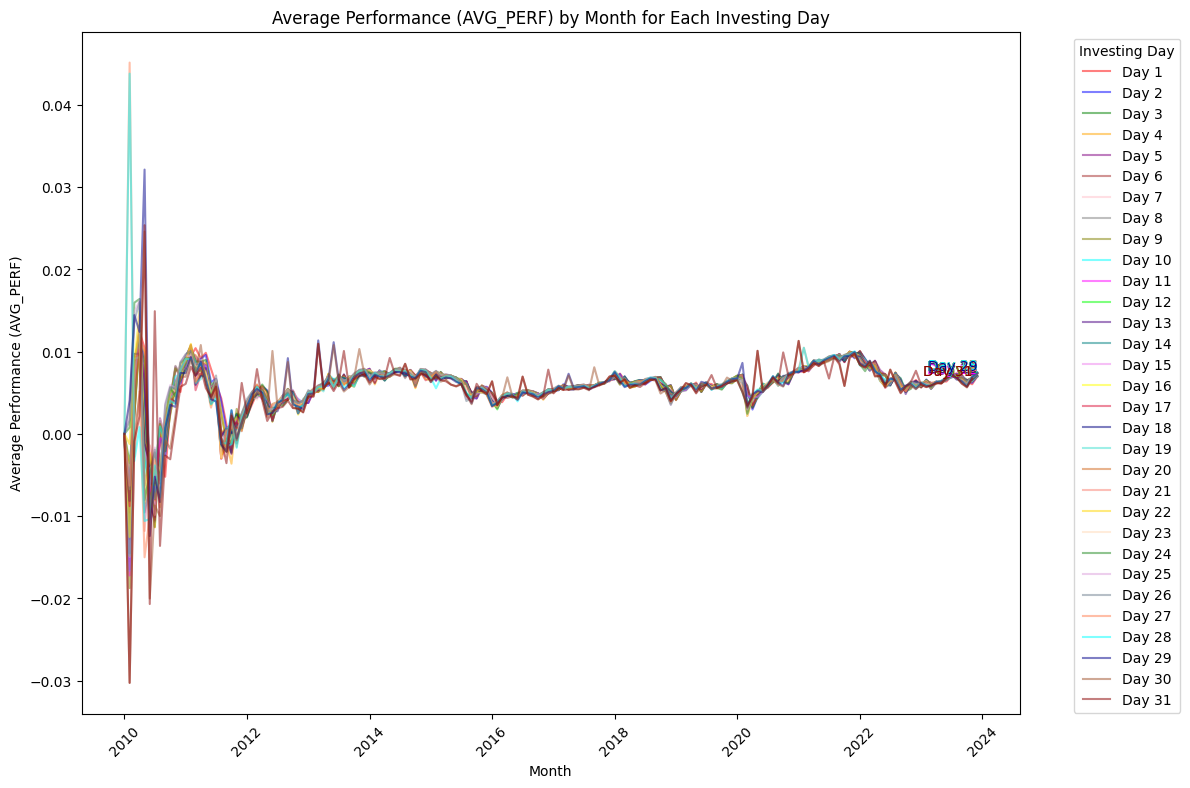

In [5]:
investing_days = list(range(1, 32))

colors = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'orange', 5: 'purple', 6: 'brown',
    7: 'pink', 8: 'gray', 9: 'olive', 10: 'cyan', 11: 'magenta', 12: '#00FF00',
    13: 'indigo', 14: 'teal', 15: 'violet', 16: 'yellow', 17: 'crimson', 
    18: 'navy', 19: 'turquoise', 20: 'chocolate', 21: 'salmon', 22: 'gold', 
    23: '#FFDAB9', 24: 'forestgreen', 25: 'plum', 26: 'slategray', 27: 'coral', 
    28: 'aqua', 29: 'darkblue', 30: 'sienna', 31: 'darkred'
}

all_results = []

for investing_day in investing_days:
    dataset = normalized_data.loc[normalized_data['CHOSEN_DAY'] == investing_day, ['FIRST_OPEN_DATE', 'TICKER', 'OPEN', 'BASE_OPEN', 'CHOSEN_DAY', 'MONTH']]
    dataset.reset_index(drop=True, inplace=True)
    dataset['OPEN'] = pd.to_numeric(dataset['OPEN'], errors='coerce')
    
    dataset['INVESTED_THIS_DAY'] = 10000
    dataset['TOTAL_INVESTED'] = dataset['INVESTED_THIS_DAY'].cumsum()
    dataset['SHARES_BOUGHT_THIS_DAY'] = dataset['INVESTED_THIS_DAY'] / dataset['OPEN']
    dataset['HELD_SHARES'] = dataset['SHARES_BOUGHT_THIS_DAY'].cumsum()
    dataset['TOTAL_VALUE'] = dataset['HELD_SHARES'] * dataset['OPEN']
    dataset['PERF'] = dataset['TOTAL_VALUE'] / dataset['TOTAL_INVESTED'] - 1
    dataset['DAY_OCCURRENCE'] = dataset.groupby('CHOSEN_DAY').cumcount() + 1
    dataset['AVG_PERF'] = dataset['PERF'] / dataset['DAY_OCCURRENCE']
    
    all_results.append(dataset)

final_dataset = pd.concat(all_results)
final_dataset['MONTH'] = pd.to_datetime(final_dataset['MONTH'], format='%Y-%m')
final_dataset = final_dataset.sort_values(by='MONTH')

plt.figure(figsize=(12, 8))

for investing_day in investing_days:
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors[investing_day]
    plt.plot(day_data['MONTH'], day_data['AVG_PERF'], label=f'Day {investing_day}', color=color, alpha=0.5)
    plt.text(day_data['MONTH'].iloc[-1], day_data['AVG_PERF'].iloc[-1], f'Day {investing_day}', color=color, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.title('Average Performance (AVG_PERF) by Month for Each Investing Day')
plt.xlabel('Month')
plt.ylabel('Average Performance (AVG_PERF)')
plt.legend(title='Investing Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

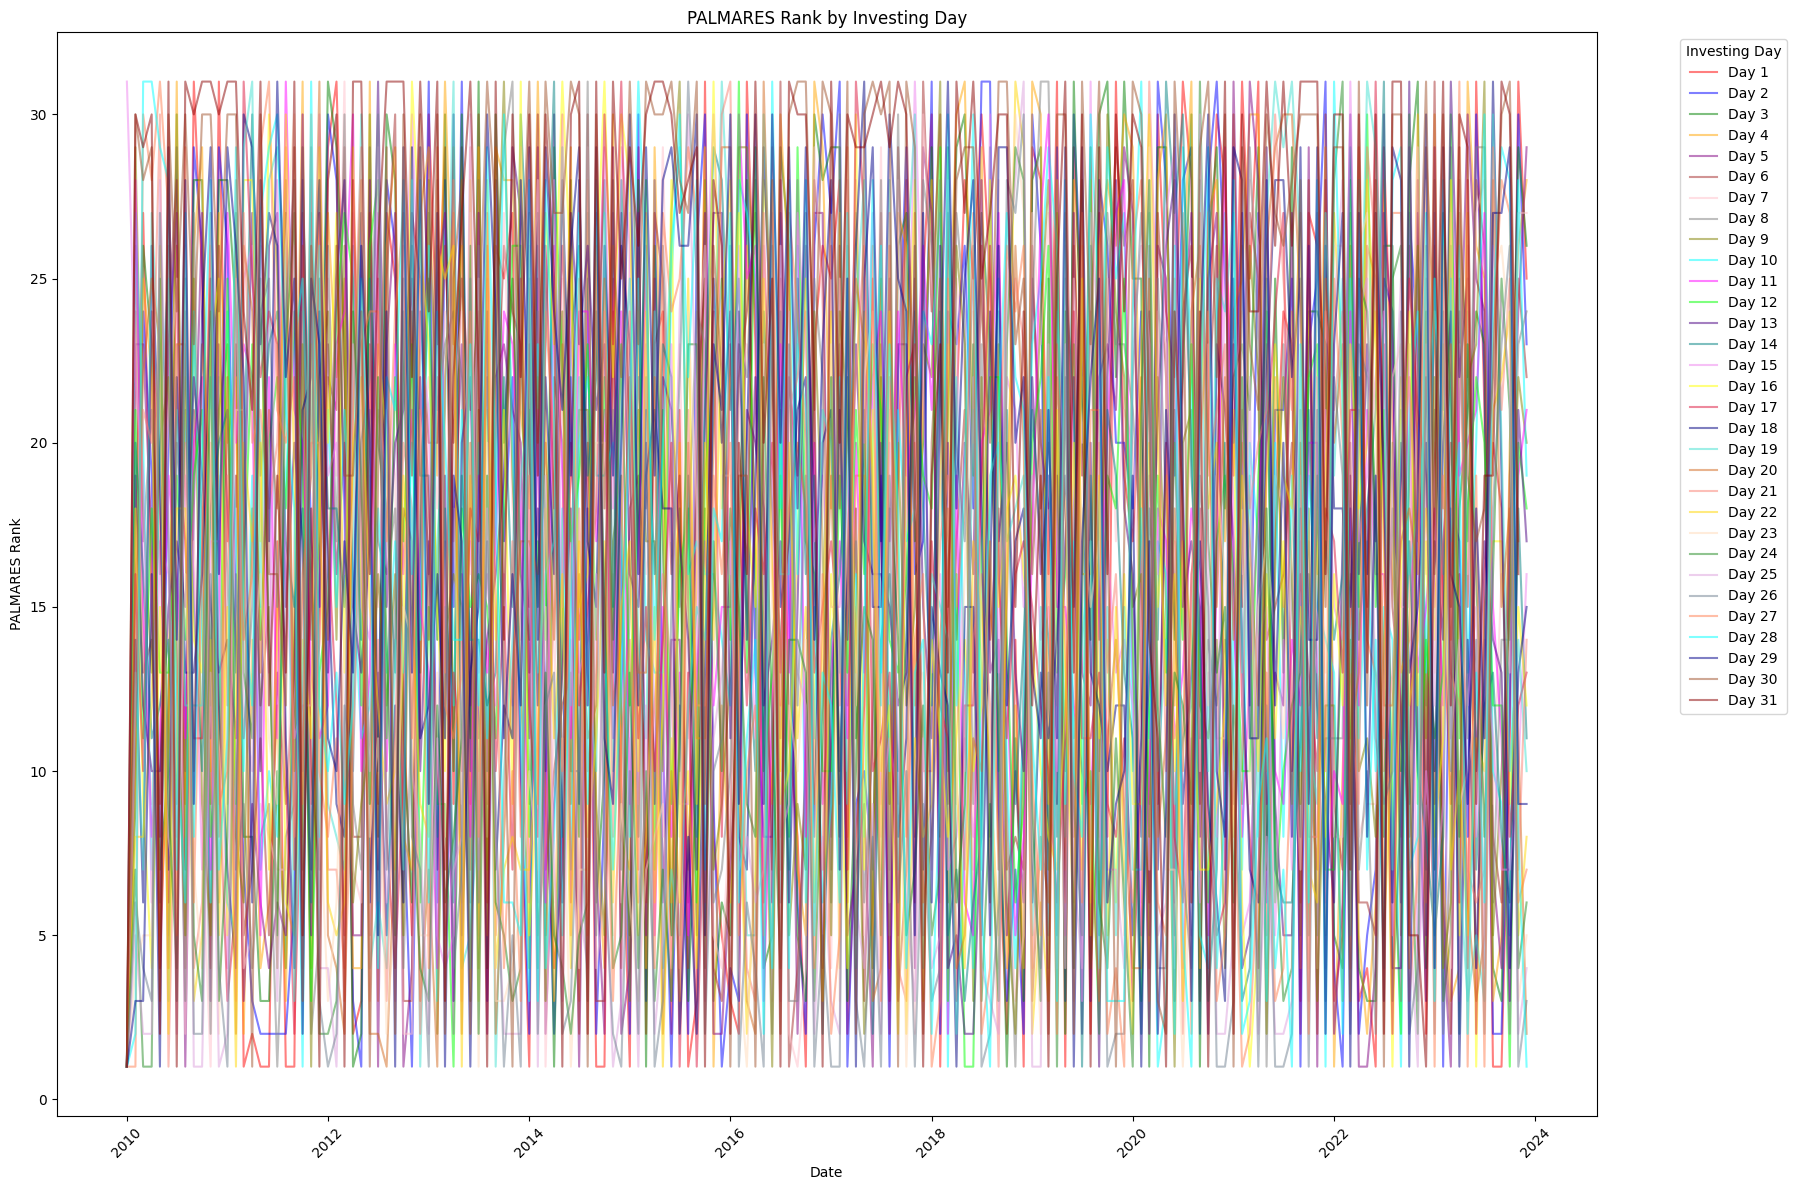

In [6]:
# Calculate the rank of each DAY by MONTH based on AVG_PERF
final_dataset['PALMARES'] = final_dataset.groupby('MONTH')['AVG_PERF'].rank(ascending=False, method='min')
final_dataset = final_dataset.sort_values(by=['CHOSEN_DAY', 'MONTH'])

plt.figure(figsize=(18, 12))

for investing_day in investing_days:
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors[investing_day]
    plt.plot(day_data['MONTH'], day_data['PALMARES'], label=f'Day {investing_day}', color=color, alpha=0.5)

plt.title('PALMARES Rank by Investing Day')
plt.xlabel('Date')
plt.ylabel('PALMARES Rank')
plt.legend(title='Investing Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


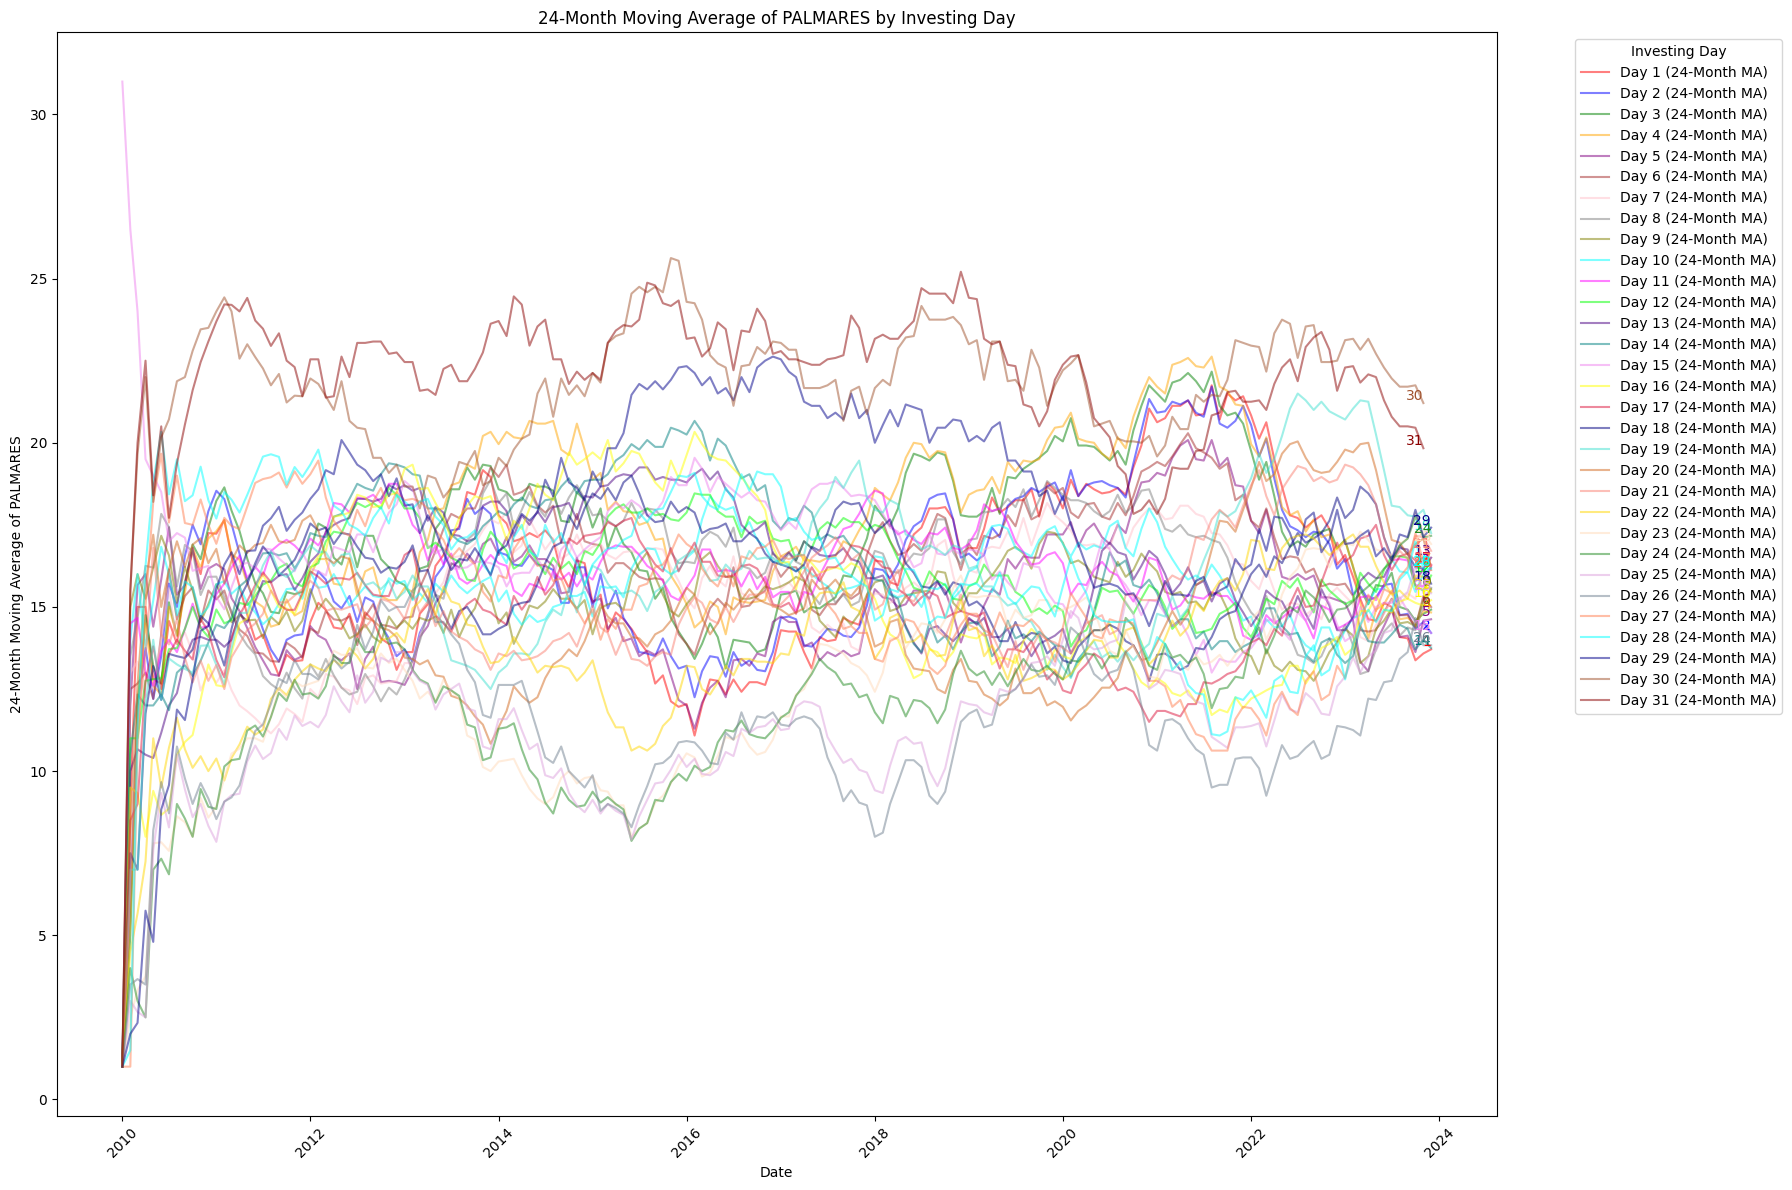

In [7]:
#We calculate the SMA24 for each day to try to smooth the overall vision:
final_dataset['MA24_PALMARES'] = final_dataset.groupby('CHOSEN_DAY')['PALMARES'].transform(lambda x: x.rolling(window=24, min_periods=1).mean())

plt.figure(figsize=(18, 12))

for investing_day in investing_days:
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors[investing_day]
    
    plt.plot(day_data['MONTH'], day_data['MA24_PALMARES'], label=f'Day {investing_day} (24-Month MA)', color=color, alpha=0.5)

    last_point = day_data.iloc[-1]
    plt.text(last_point['MONTH'], last_point['MA24_PALMARES'], str(last_point['CHOSEN_DAY']), color=color, 
             verticalalignment='bottom', horizontalalignment='right', fontsize=10)

plt.title('24-Month Moving Average of PALMARES by Investing Day')
plt.xlabel('Date')
plt.ylabel('24-Month Moving Average of PALMARES')
plt.legend(title='Investing Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


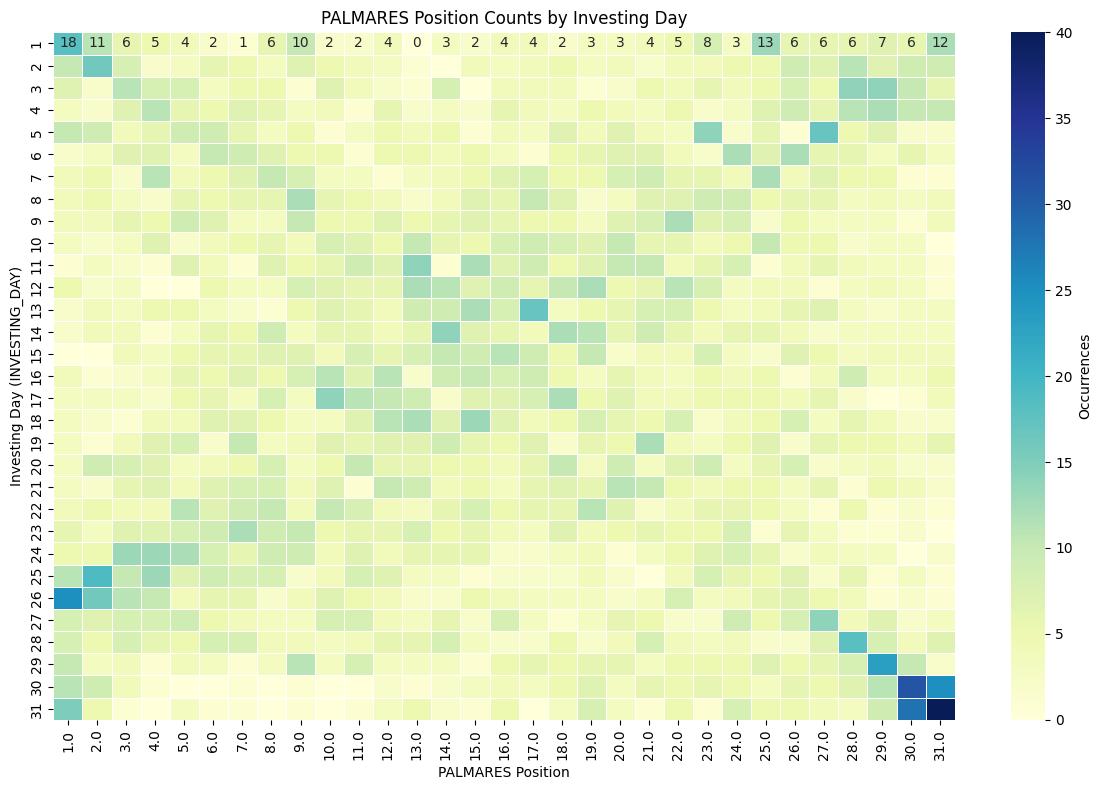

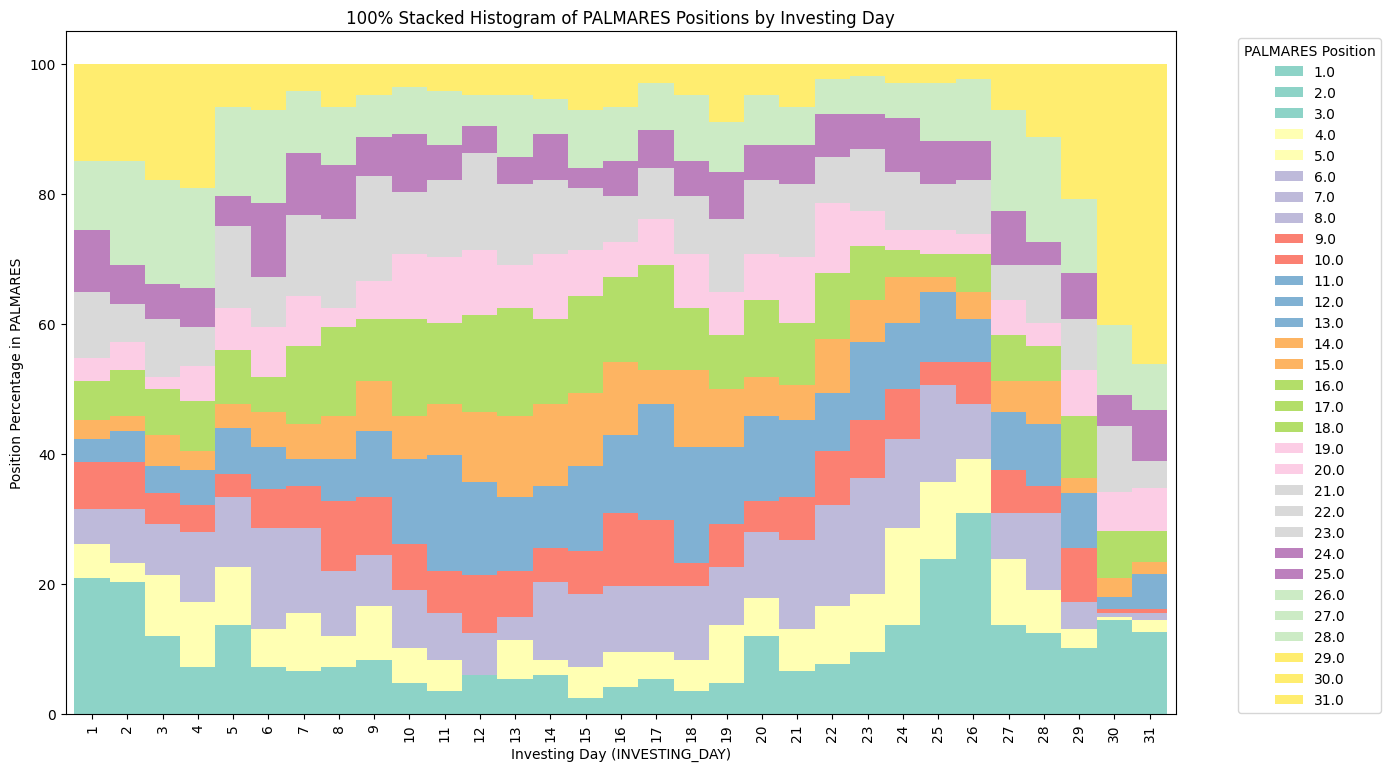

In [8]:
# 1. Count the occurrences of each INVESTING_DAY in each PALMARES position
position_counts = final_dataset.groupby(['CHOSEN_DAY', 'PALMARES']).size().unstack(fill_value=0)

# 2. Heatmap: Visualize the counts
plt.figure(figsize=(12, 8))
sns.heatmap(position_counts, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Occurrences'}, linewidths=0.5)
plt.title('PALMARES Position Counts by Investing Day')
plt.xlabel('PALMARES Position')
plt.ylabel('Investing Day (INVESTING_DAY)')
plt.tight_layout()
plt.show()

# 3. Stacked histogram (100%): Calculate percentages for each position
position_percentage = position_counts.div(position_counts.sum(axis=1), axis=0) * 100

position_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3', width=1, edgecolor='none')
plt.title('100% Stacked Histogram of PALMARES Positions by Investing Day')
plt.xlabel('Investing Day (INVESTING_DAY)')
plt.ylabel('Position Percentage in PALMARES')
plt.legend(title='PALMARES Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


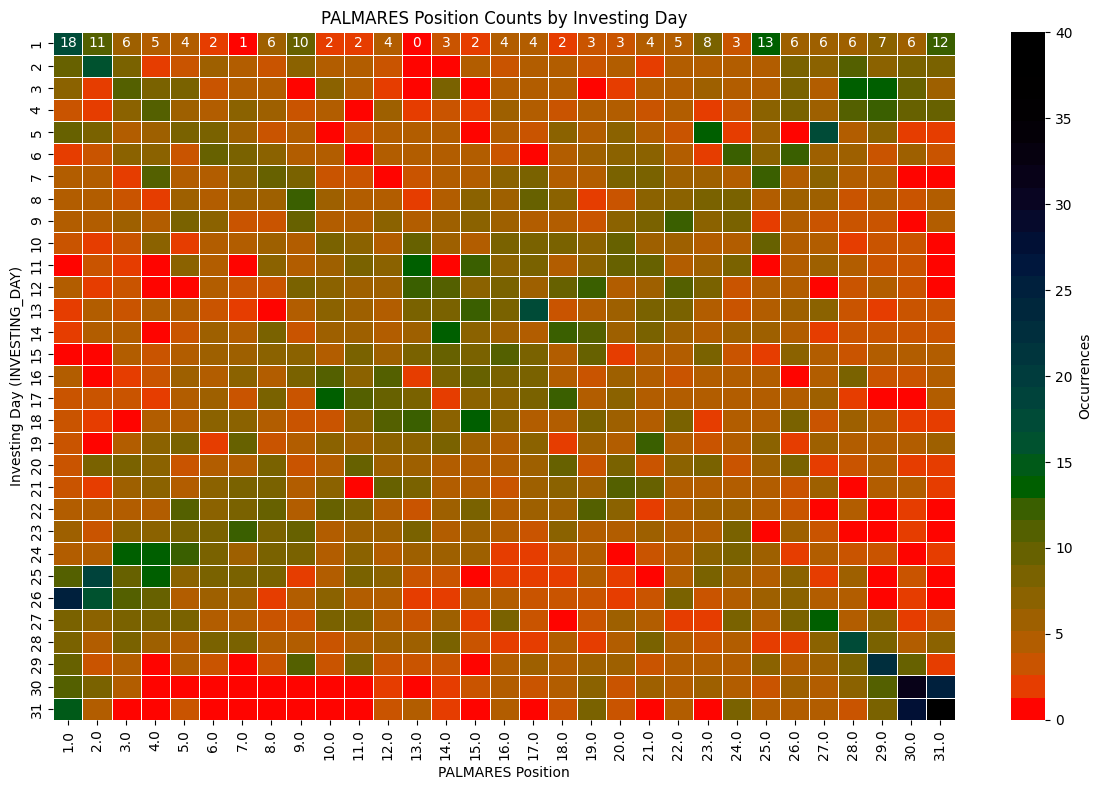

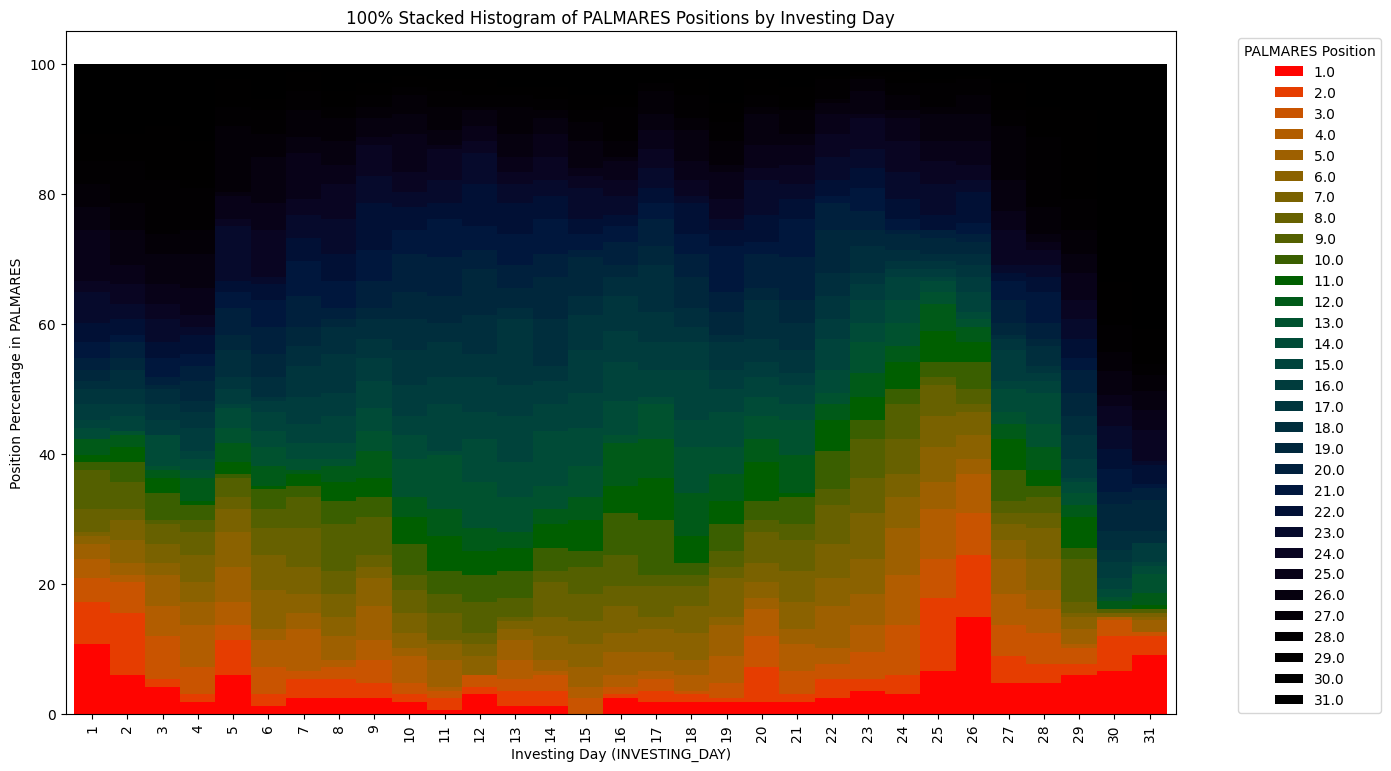

In [9]:
custom_colors = [
    '#ff0400', '#e63d00', '#c95400', '#b25d00', '#9e6000', '#8b6200', '#7a6200', '#676100', '#546000', 
    '#3a5f00', '#005f00', '#005a18', '#00522f', '#004b37', '#00433b', '#003c3d', '#00353d', '#002e3d', 
    '#00273c', '#00203d', '#00173d', '#011035', '#060a2c', '#090522', '#080218', '#06010f', '#040007', 
    '#020002', '#010000', '#000000', '#000000'
]

# 1. Count the occurrences of each INVESTING_DAY in each PALMARES position
position_counts = final_dataset.groupby(['CHOSEN_DAY', 'PALMARES']).size().unstack(fill_value=0)

# 2. Heatmap: Visualize the counts with custom colors
plt.figure(figsize=(12, 8))
sns.heatmap(position_counts, annot=True, fmt="d", cmap=sns.color_palette(custom_colors), cbar_kws={'label': 'Occurrences'}, linewidths=0.5)
plt.title('PALMARES Position Counts by Investing Day')
plt.xlabel('PALMARES Position')
plt.ylabel('Investing Day (INVESTING_DAY)')
plt.tight_layout()
plt.show()

# 3. Stacked histogram (100%): Calculate percentages for each position
position_percentage = position_counts.div(position_counts.sum(axis=1), axis=0) * 100
position_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), color=custom_colors[:31], width=1, edgecolor='none')

plt.title('100% Stacked Histogram of PALMARES Positions by Investing Day')
plt.xlabel('Investing Day (INVESTING_DAY)')
plt.ylabel('Position Percentage in PALMARES')
plt.legend(title='PALMARES Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


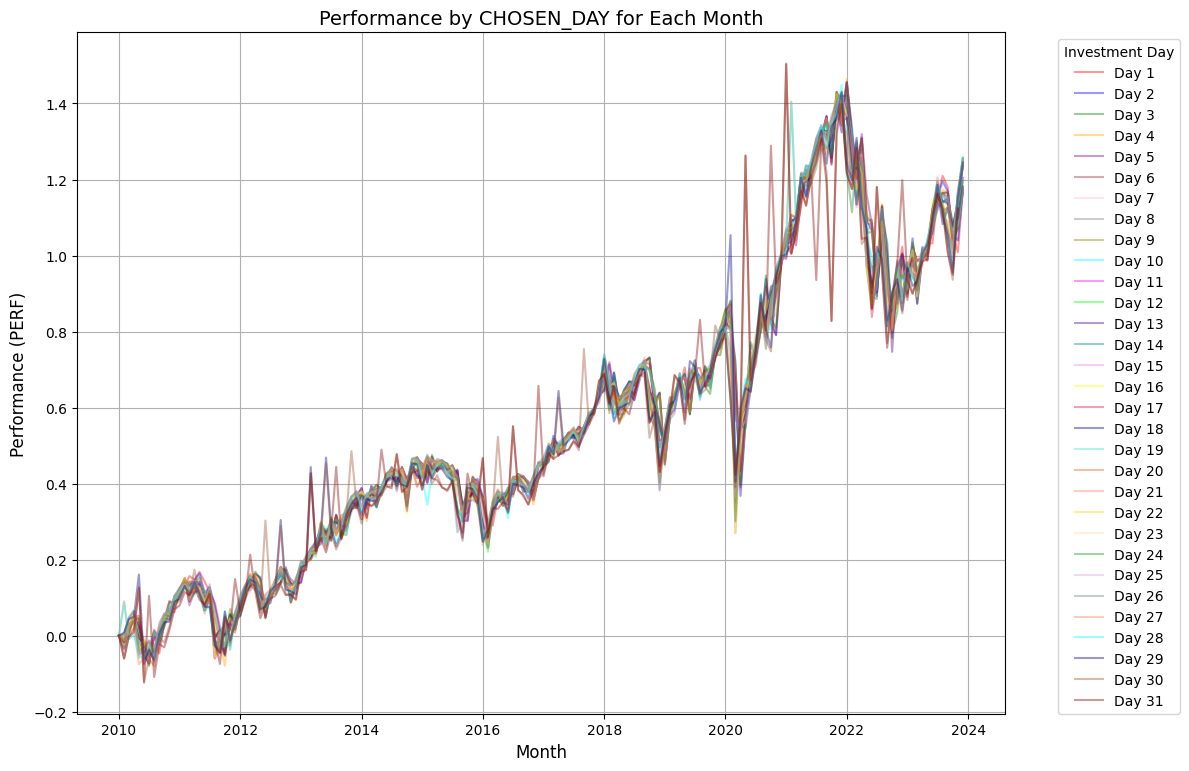

In [10]:
plt.figure(figsize=(12, 8))

# Plot performance for each investment day (CHOSEN_DAY) by month
for investing_day in range(1, 32):
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors.get(investing_day, 'black')  # Default to 'black' if no color is defined
    plt.plot(day_data['MONTH'], day_data['PERF'], label=f'Day {investing_day}', color=color, alpha=0.4)

plt.title('Performance by CHOSEN_DAY for Each Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Performance (PERF)', fontsize=12)
plt.legend(title="Investment Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
